# QMBS

In [14]:
import numpy as np
from qutip import *
from matplotlib import pyplot as plt
import scipy.sparse as sparse
from scipy.signal import find_peaks
N=12

In [3]:
def genPsi0(L):
    if L%4 == 0:
        state_list = ([basis(2, 1)] + [basis(2, 0)] + [basis(2, 0)] + [basis(2, 1)]) * (int(L/4))
    else:
        state_list = ([basis(2, 1)] + [basis(2, 0)] + [basis(2, 0)] + [basis(2, 1)]) * (int(L/4))+ ([basis(2, 1)] + [basis(2, 0)])
    state_thermal = (([basis(2,1)] + [basis(2,0)]) * int(L/2))
    psi0 = tensor(state_list)
    psi_thermal = tensor(state_thermal)
    return psi0, psi_thermal


In [4]:
def genHamiltonian(L):
    
    omega = 0.05 * np.pi * np.ones(L)

    # Interaction coefficients
    Ja = 0.3 * np.pi * np.ones(L)
    Je = 0.2 * np.pi * np.ones(L)
    Jx = 0.03 * np.pi * np.ones(L)
    
    sx_list, sy_list, sz_list, sm_list, sp_list = [], [], [], [], []
    
    for i in range(L):
        op_list = [qeye(2)] * L
        op_list[i] = sigmax()
        sx_list.append(tensor(op_list))
        op_list[i] = sigmay()
        sy_list.append(tensor(op_list))
        op_list[i] = sigmaz()
        sz_list.append(tensor(op_list))
        op_list[i] = sigmap()
        sp_list.append(tensor(op_list))
        op_list[i] = sigmam()
        sm_list.append(tensor(op_list))

    # Hamiltonian - transition frequenmcy term
    H = 0
    for i in range(L):
        H += 0.5 * omega[i] * sp_list[i]*sm_list[i]

    # Interaction terms
    for n in range(L - 1):
        if n%2 ==0:
            H += -0.5 * Ja[n] * sp_list[n] * sm_list[n + 1]
            H += -0.5 * Ja[n] * sm_list[n] * sp_list[n + 1]
        else:
            H += -0.5 * Je[n] * sp_list[n] * sm_list[n + 1]
            H += -0.5 * Je[n] * sm_list[n] * sp_list[n + 1]

    # Cross coupling terms
    #for n in range(N):
       # H += -0.5 * Jx[n] * sp_list[n] * sm_list[(n + 4)%N]
       # H += -0.5 * Jx[n] * sm_list[n] * sp_list[(n + 4)%N]
    
    return H


In [5]:
def plotEntropy(results):
    for result in results:
        entropy = []
        for Psi_T in result.states:
            rho = ptrace(Psi_T,[0,1,2,3])
            entropy.append(entropy_vn(rho))
        plt.plot(entropy)
    plt.xlabel = 'timesteps'
    plt.ylabel = 'VN Entropy'
    

In [6]:
def plotFidelity(results):
    for result in results:
        rho0 = ptrace(result.states[0],[0,1,2,3])
        fidelitylist = []
        for Psi_T in result.states:
            rho = ptrace(Psi_T,[0,1,2,3])
            fidelitylist.append(fidelity(rho0,rho))
        plt.plot(fidelitylist)
    plt.xlabel = 'timesteps'
    plt.ylabel = 'Fidelity'

In [7]:
times = np.linspace(0,25,1000)
results =[]
results_t = []
for systemLength in [12]:
    H = genHamiltonian(systemLength)
    psi0, psi_thermal = genPsi0(systemLength)
    result = sesolve(H,psi0,times)
    resultsThermal = sesolve(H,psi_thermal,times)
    results.append(result)
    results_t.append(resultsThermal)

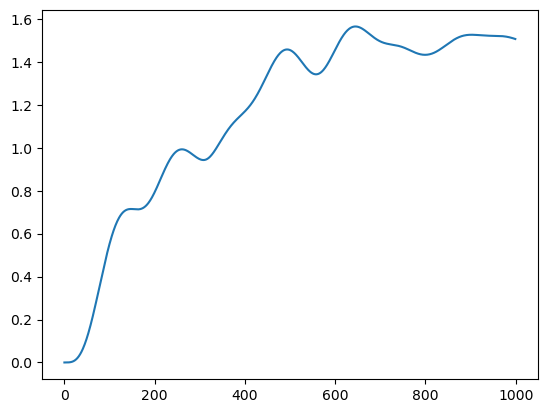

In [8]:
plotEntropy(results)

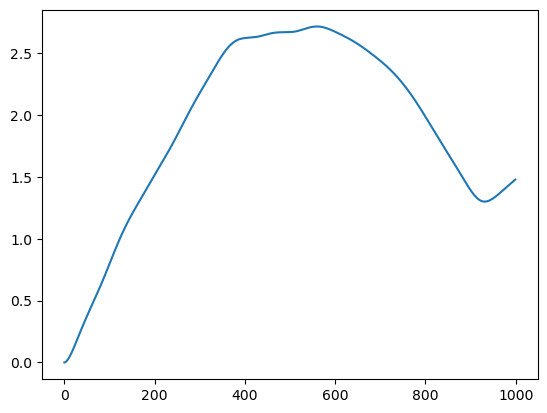

In [9]:
plotEntropy(results_t)

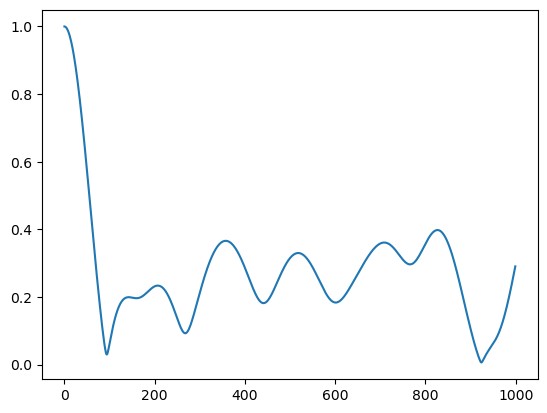

In [10]:
plotFidelity(results_t)

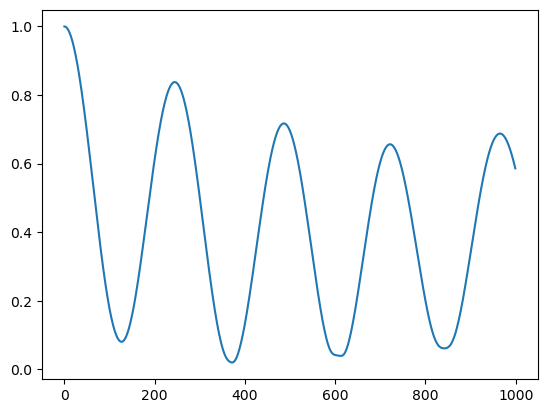

In [11]:
plotFidelity(results)

In [6]:
VNEntropy=[]
thermalVN = []
thermalfidelity=[]
fourfidelity = []
rho0=ptrace(psi0,[0,1,2,3])
rho0_thermal = ptrace(psi_thermal,[0,1,2,3])
for Psi_T in result.states:
    rho=ptrace(Psi_T,[0,1,2,3])
    VNEntropy.append(entropy_vn(rho))
    fourfidelity.append(fidelity(rho0,rho))
for Psi_T in resultsThermal.states:
    rho=ptrace(Psi_T,[0,1,2,3])
    thermalVN.append(entropy_vn(rho))
    thermalfidelity.append(fidelity(rho0_thermal,rho))
    

In [7]:
exp_sz_t_scar = expect(sz_list, result.states)
exp_sz_0_scar = expect(sz_list,psi0)
exp_sz_t2_scar=[]
for i in range(len(exp_sz_0_scar)):
    exp_sz_t2_scar.append(exp_sz_0_scar[i]*exp_sz_t_scar[i])
imbalance =  1/N* sum(exp_sz_t2_scar)

In [8]:
exp_sz_t_thermal = expect(sz_list, resultsThermal.states)
exp_sz_0_thermal = expect(sz_list,psi_thermal)
exp_sz_t2_thermal=[]
for i in range(len(exp_sz_0_thermal)):
    exp_sz_t2_thermal.append(exp_sz_0_thermal[i]*exp_sz_t_thermal[i])
imbalance_thermal =  1/N* sum(exp_sz_t2_thermal)

In [9]:
fidelitylist = []
thermalfullFidelity= []

for i in range(len(result.times)):
    fidelitylist.append(np.vdot(result.states[0],result.states[i])*np.conj(np.vdot(result.states[0],result.states[i])))
    thermalfullFidelity.append(np.vdot(resultsThermal.states[0],resultsThermal.states[i])*np.conj(np.vdot(resultsThermal.states[0],resultsThermal.states[i])))

C:\Users\Charlie\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


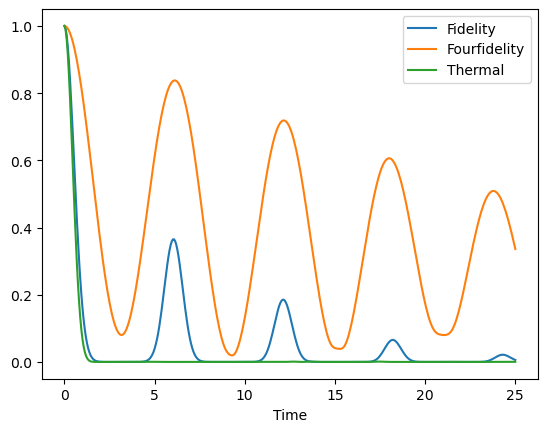

In [10]:
plt.plot(times,fidelitylist,label = 'Fidelity')
plt.plot(times,fourfidelity,label='Fourfidelity')
plt.plot(times, thermalfullFidelity,label='Thermal')
plt.xlabel('Time')
plt.legend()


In [11]:
peaks = find_peaks(fidelitylist)
peaks

C:\Users\Charlie\anaconda3\lib\site-packages\scipy\signal\_peak_finding.py:261: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


(array([ 97, 194, 252, 291, 338, 354, 388], dtype=int64), {})

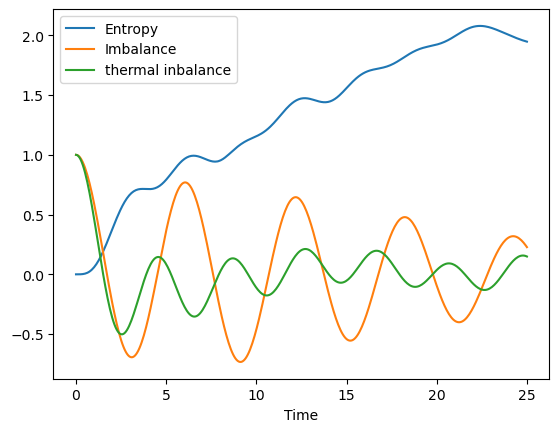

In [12]:
plt.plot(times,VNEntropy,label = 'Entropy')
plt.plot(times,imbalance, label = 'Imbalance')
plt.plot(times,imbalance_thermal, label = 'thermal inbalance')
plt.xlabel('Time')
plt.legend()

In [13]:
from scipy.fft import fft,fftfreq

In [14]:
intensity_imbalance = fft(imbalance,n=400)

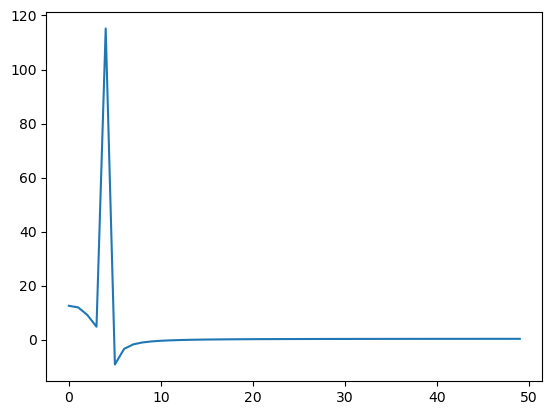

In [15]:
plt.plot(intensity_imbalance[:50])

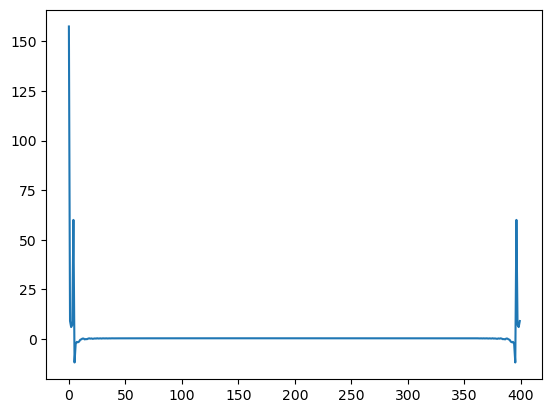

In [16]:
intensity_fidelity = fft(fourfidelity)
plt.plot(intensity_fidelity)

In [17]:
vals, vecs = sparse.linalg.eigsh(H.data,k=500, which = 'SA')

In [18]:
overlap = []
for i in range(len(vals)):
    overlap.append(np.log10((np.abs(np.vdot(result.states[0],vecs[:,i])*np.conj(np.vdot(result.states[0],vecs[:,i])))**2)))

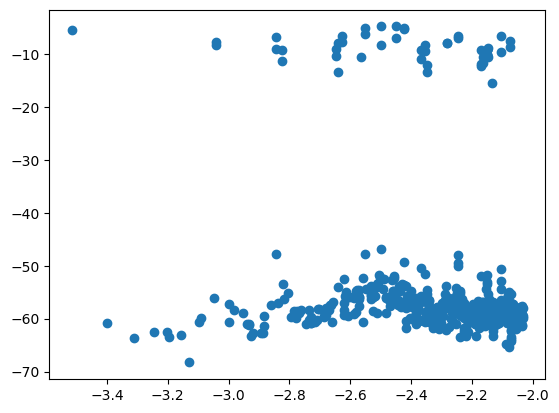

In [19]:
plt.scatter(vals,overlap)

In [20]:
vecs[:,9]

array([-3.97831546e-18-9.66074100e-21j,  7.66536631e-18-4.49544195e-18j,
       -2.51012771e-18-8.12358707e-18j, ...,
        1.55839812e-18-2.30442828e-18j,  6.11683002e-18-1.68713144e-18j,
        4.80752581e-18-1.43301404e-18j])

In [21]:
eigensates[4]

NameError: name 'eigensates' is not defined

In [ ]:
result.states[0].overlap(eigensates[60])

In [ ]:
EigenEntropy =[]
for i in range(len(eigensates)):
    EigenEntropy.append(entropy_vn(ptrace(vecs[:,i], (range(int(N/2))))))
                        
    

In [ ]:
plt.scatter(eigenvalues,EigenEntropy)

In [ ]:
vecs[:,10]

In [38]:
sJK_list=[]
sJlist = []
for z in range(N):
    op_list = [qeye(2)]*N
    if z%2 ==1:
        op_list[z]= sigmaz()
    else:
        op_list[z] = -1*sigmaz()
    sJlist.append(tensor(op_list))
for j in range(N):
    for k in range(N):
        op_list = [qeye(2)] * N
        if j>k:
            op_list[j] = sigmaz()
            op_list[k] = sigmaz()
            if j%2 ==1:
                op_list[j]= sigmaz()
            else:
                op_list[j] = -1*sigmaz()
            if k%2 ==1:
                op_list[k]= sigmaz()
            else:
                op_list[k] = -1*sigmaz()
            sJK_list.append(tensor(op_list))


In [51]:
SJKexpect = sum(expect(sJK_list,result.states))
SJKTexpect = sum(expect(sJK_list, results_t[0].states))
SJKrand = sum(expect(sJK_list, randresults.states))

In [52]:
SJexpect = sum(expect(sJlist,result.states))
SJTexpect = sum(expect(sJlist, results_t[0].states))#
SJrand = sum(expect(sJlist, randresults.states))

In [53]:
FQI = 4 *(SJKexpect - SJexpect**2)
FQIT = 4 *(SJKTexpect - SJTexpect**2)
FQIR = 4* (SJKrand - SJrand**2)

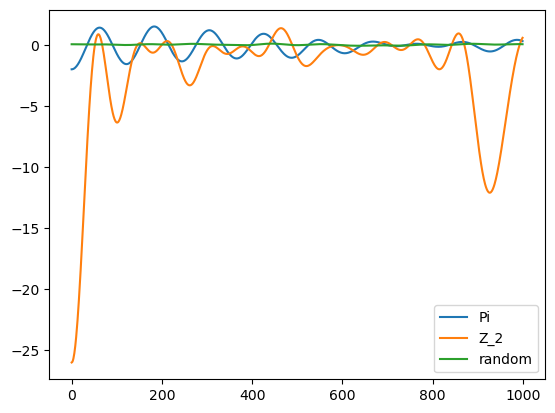

In [58]:
plt.plot(FQI/N, label = 'Pi')
plt.plot(FQIT/N, label = 'Z_2')
plt.plot(FQIR/N, label = 'random')
plt.legend()

In [28]:
sum(expect(sJK_list,result.states[0]))

-12.0

In [ ]:
def Jij(J0,Alpha,N):
    J_ij = []
    for i,j in range(N):
        if i >j:
            J_ij.append(J0/(i-j)**Alpha)
    return J_ij

In [ ]:
len(sJK_list)

In [57]:
results[4].states[0]

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = (4096, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]

In [71]:
genHamiltonian(systemLength)

IndexError: index 12 is out of bounds for axis 0 with size 12

In [50]:

randresults = sesolve(H,rand_ket(dims=psi0.dims),times)

In [61]:
randresults.states[0]-

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = (4096, 1), type = ket
Qobj data =
[[ 0.0047998 -0.01661473j]
 [-0.01851557-0.00670708j]
 [ 0.00467129-0.00396168j]
 ...
 [-0.01205825-0.01216698j]
 [-0.00264456+0.00322209j]
 [ 0.00231659-0.00374857j]]

In [77]:
import random
def randhalffilledstate(N):
    nonzerolist = random.sample(range(int(2**N)), int(2**(N/2)))
    ket = np.zeros(2**N)
    for index in nonzerolist:
        ket[index] += random.rand()
    return
        

In [78]:
randhalffilledstate(12)

AttributeError: module 'random' has no attribute 'rand'